In [7]:
%matplotlib inline
!pip install scikit-learn
!pip install seaborn
!pip install geopandas matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from glob import glob
import geopandas as gpd

from scipy.spatial import distance_matrix
from sklearn.preprocessing import MinMaxScaler

# Para no mostrar 'Future Warnings' producto de que algunos paquetes aún
# trabajan con versiones no actualizadas de otros paquetes
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
DATOS_generales = pd.read_csv('./datos_proyecto_general_filtrados.csv')
DATOS_generales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5075 entries, 0 to 5074
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fecha de venta         5075 non-null   object 
 1   Nombre                 5075 non-null   object 
 2   Ciudad                 5075 non-null   object 
 3   País                   5075 non-null   object 
 4   Importe del pedido     5075 non-null   float64
 5   Cantidad de descuento  5075 non-null   float64
 6   Total del pedido       5075 non-null   float64
dtypes: float64(3), object(4)
memory usage: 277.7+ KB


In [9]:
ventas_descuento = DATOS_generales[DATOS_generales['Cantidad de descuento']> 0.0]
ventas_descuento['descuento_porcentaje'] = round(((ventas_descuento['Cantidad de descuento']*100)
                                                  // ventas_descuento['Importe del pedido'])/5)*5
ventas_sin_descuento = DATOS_generales[DATOS_generales['Cantidad de descuento']== 0.0]
print((ventas_descuento.shape[0],ventas_sin_descuento.shape[0]))
324/5071

(324, 4751)


C:\Users\Carlosim\AppData\Local\Temp\ipykernel_6104\2175138885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_descuento['descuento_porcentaje'] = round(((ventas_descuento['Cantidad de descuento']*100)


0.06389272332873201

In [10]:
ventas_descuento['descuento_porcentaje'].unique()

array([10., 15., 20.,  5., 30., 50., 40., 35., 25.])

In [11]:
suma_ventas_descuento = ventas_descuento['Importe del pedido'].sum()
suma_ventas_sin_descuento = ventas_sin_descuento['Importe del pedido'].sum()
print((suma_ventas_descuento,suma_ventas_sin_descuento))

(3384.15, 43322.1)


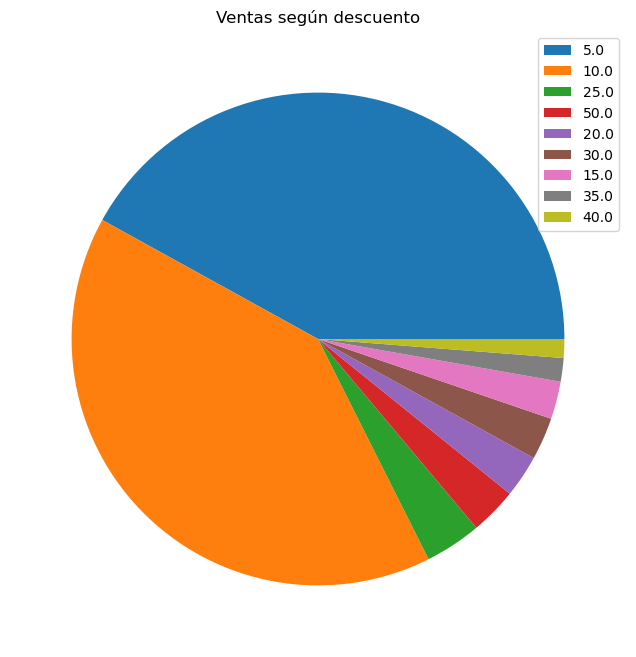

In [16]:
conteo_descuento = ventas_descuento['descuento_porcentaje'].value_counts()

# Obtener etiquetas y porcentajes
etiquetas = conteo_descuento.index
porcentajes = conteo_descuento.values

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(porcentajes)

# Añadir título
ax.set_title('Ventas según descuento')

# Crear leyenda con las etiquetas
plt.legend(etiquetas, loc='upper right')

# Eliminar el fondo fuera del gráfico
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

plt.savefig('grafico_tipo_descuento.png', transparent=True)

# Mostrar la gráfica
plt.show()

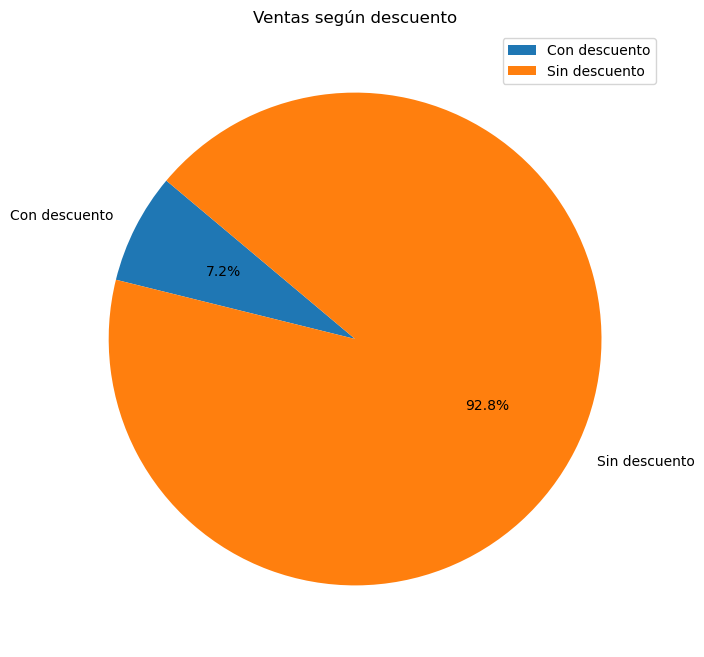

In [17]:
etiquetas = ['Con descuento', 'Sin descuento']
valores = [suma_ventas_descuento, suma_ventas_sin_descuento]

# Crear la gráfica de tarta
fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)

# Añadir título
ax.set_title('Ventas según descuento')

# Crear leyenda con las etiquetas
plt.legend(etiquetas, loc='upper right')

# Eliminar el fondo fuera del gráfico
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

plt.savefig('grafico_ventas_descuento.png', transparent=True)

# Mostrar la gráfica
plt.show()